<a href="https://colab.research.google.com/github/dtabuena/Images/blob/main/Cell_Pose_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install python-bioformats


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 40.3 MB 1.6 MB/s 
     |████████████████████████████████| 132 kB 40.2 MB/s 
     |████████████████████████████████| 1.3 MB 41.5 MB/s 
     |████████████████████████████████| 829 kB 6.8 MB/s 
     |████████████████████████████████| 9.3 MB 39.5 MB/s 
     |████████████████████████████████| 79 kB 3.4 MB/s 
     |████████████████████████████████| 140 kB 11.0 MB/s 
  Created wheel for python-javabridge: filename=python_javabridge-4.0.3-cp37-cp37m-linux_x86_64.whl size=1628170 sha256=4fd470d83526112035b577a663e21fddb4250c0c9282d6127d62b3c0742b2827
  Stored in directory: /root/.cache/pip/wheels/63/7e/91/01b1bd8d29b4323834feb5cfec49b857fb212e6efc74ce103c
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=d9b9a0e0f0ecfcc6fbcd50259ec13d459a1b30b28f7675a8901a2a0f3e88d3ed
  Stored in directory: /root/.cache/pip/wheels/56/b0/f

In [2]:
import numpy as np
import javabridge
import bioformats
import skimage
from skimage import filters
from matplotlib import pyplot as plt
import matplotlib
import os
import scipy
from scipy import ndimage as ndi
javabridge.start_vm(class_path=bioformats.JARS)



def get_drobox_folder(link, new_filename):
    'Download a folder from dropbox and unzip'
    zipped_file_path = "/content/"+new_filename + ".zip"
    unzipped_file_path = "/content/"+new_filename
    if not( os.path.exists(zipped_file_path)):
        !wget -O $zipped_file_path $link    # download with new name
    !echo A | unzip $zipped_file_path -d $unzipped_file_path 
    return new_filename

def get_sub_files(rootdir):
    'Recursively search subfolders and return a list of all files'
    file_list =[]
    for rootdir, dirs, files in os.walk(rootdir): 
            file_list.extend([os.path.join(rootdir,f) for f in files])
    return file_list

folder = get_drobox_folder('https://www.dropbox.com/sh/rv7944fsk9p1mvk/AAC0E8ZTPkr-pfgK8zdC730Sa?dl=0', 'images')
file_list = get_sub_files(folder)
file_list.sort()

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


--2022-10-19 15:59:00--  https://www.dropbox.com/sh/rv7944fsk9p1mvk/AAC0E8ZTPkr-pfgK8zdC730Sa?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /sh/raw/rv7944fsk9p1mvk/AAC0E8ZTPkr-pfgK8zdC730Sa [following]
--2022-10-19 15:59:00--  https://www.dropbox.com/sh/raw/rv7944fsk9p1mvk/AAC0E8ZTPkr-pfgK8zdC730Sa
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc251284c5e6d9ff5a55c6d9049a.dl.dropboxusercontent.com/zip_download_get/BSjhAd6Xgq0nzDXp58JW6TPaKLN0TuLr5euQLCaoUejpIRi1dkXpbVwmV2DB2XOw-KQw0YpYO2m7uIJxUPKV5Zg3kz4oVwocXX5aEhckM49ZSA# [following]
--2022-10-19 15:59:01--  https://uc251284c5e6d9ff5a55c6d9049a.dl.dropboxusercontent.com/zip_download_get/BSjhAd6Xgq0nzDXp58JW6TPaKLN0TuLr5euQLCaoUejpIRi1dkXpbVwmV2DB2XOw-KQw0YpYO2m7uIJxUPKV5Zg3kz4o

In [28]:
im_num = 2
print(file_list[im_num])
my_reader = bioformats.get_image_reader('my_image', file_list[im_num])

c_dim = my_reader.rdr.getSizeC()
z_dim = my_reader.rdr.getSizeZ()
x_dim = my_reader.rdr.getSizeX()
y_dim = my_reader.rdr.getSizeY()
print(x_dim,y_dim,c_dim,z_dim)

image = np.empty([x_dim,y_dim,c_dim,z_dim])
for zi in range(z_dim):
    img_zi = my_reader.read(c=None, z=zi,rescale=True)
    image[:,:,:,zi] = img_zi


image_zproj = np.max(image,axis=3)
# image = np.expand_dims(image_zproj, axis=-1)
print(image.shape)
for ci in range(image.shape[2]):
    cim = image[:,:,ci,:]
    flat = cim.flatten()
    max= np.percentile(flat,100)
    assert max>0 , print(flat)
    cim = cim/max
    image[:,:,ci,:] = cim

images/MDGA2_08-25-22_DG_40X_2XZoom_1.oir
800 800 3 17
(800, 800, 3, 17)


In [4]:
import os
os.environ["CELLPOSE_LOCAL_MODELS_PATH"] = "/PATH_FOR_MODELS/"

!pip install cellpose
from cellpose import models


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 169 kB 6.1 MB/s 
     |████████████████████████████████| 4.2 MB 10.7 MB/s 
     |████████████████████████████████| 31.0 MB 202 kB/s 


In [29]:
image=image[:,:,:,1:]

In [31]:
# def score_image(image,chan_dim,cell_chan):
chan_dim = 2
cell_chan = 2
z_dim = 3
diameter = 30
min_vox = 500
ch_names = ['target','mCherry','NeuN']

'''Transpose ndims, preserve labels'''
dim_order = np.arange(image.ndim).tolist()
dim_order = [chan_dim, z_dim] + [d for d in dim_order if d not in [chan_dim, z_dim]]
chan_dim = [i for i in range(len(dim_order)) if dim_order[i]==chan_dim][0]
z_dim = [i for i in range(len(dim_order)) if dim_order[i]==z_dim][0]

'''Normalize channel intensities'''
image_r=np.transpose(image,dim_order)
ch_val_list = []
for ch in range(image_r.shape[chan_dim]):    
    ch_val = image_r[ch,:,:,:]
    ch_z = (ch_val-np.mean(ch_val.flatten())) / np.std(ch_val.flatten())
    ch_val_list.append(ch_z)
image_znorm = np.stack(ch_val_list,axis=0)


'''Generate Masks with Cellpose'''
model = models.Cellpose(model_type='cyto')
masks, _, _, _ = model.eval(image_r[cell_chan,:,:,:], diameter=diameter, channels=[0,0], stitch_threshold=.001,do_3D=False)
masks=masks.astype(float)
nan_masks_id = masks.copy().astype(float)
nan_masks_id[masks==0]=np.nan
nan_masks_bin = nan_masks_id>0
nan_masks_bin = nan_masks_bin.astype(float)
nan_masks_bin[masks==0.]=np.nan
masked_composite = image_r*np.stack([nan_masks_bin>0] * 3,axis=0)

'''Normalize Cell intensities'''
ch_val_list = []
for ch in range(masked_composite.shape[chan_dim]):    
    ch_val = image_r[ch,:,:,:]*nan_masks_bin
    ch_z = (ch_val-np.nanmean(ch_val.flatten())) / np.nanstd(ch_val.flatten())
    ch_val_list.append(ch_z)
masked_composite_znorm = np.stack(ch_val_list,axis=0)



In [22]:
import pandas as pd
'''Quantify Cell Intensities'''
cell_ids =np.arange(0,np.nanmax(masks.flatten()))+1
cell_df = pd.DataFrame({'cell_id':cell_ids}).set_index('cell_id')
for ch in range(masked_composite.shape[chan_dim]):
    for cell in cell_df.index:
        cell_df.at[cell,'size'] = np.nansum((masks.flatten()==cell))
        cell_df.at[cell,'mean_'+ch_names[ch]] = np.nansum( masked_composite_znorm[ch,:,:,:][masks==cell]) / cell_df.loc[cell,'size']
cell_df.head()


,size,mean_target,mean_mCherry,mean_NeuN
cell_id,,,,
1.0,604.0,-0.271758,1.845355,-1.184178
2.0,1117.0,-0.271758,2.946947,1.267802
3.0,100.0,-0.113524,2.256143,-0.703815
4.0,963.0,-0.271758,0.072912,-0.949919
5.0,131.0,-0.271758,0.136696,-1.014344


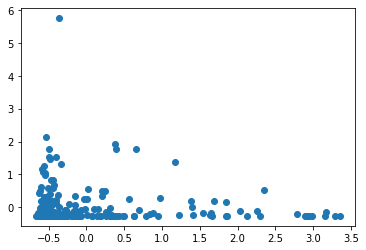

In [24]:
plt.scatter(cell_df['mean_mCherry'],cell_df['mean_target'])

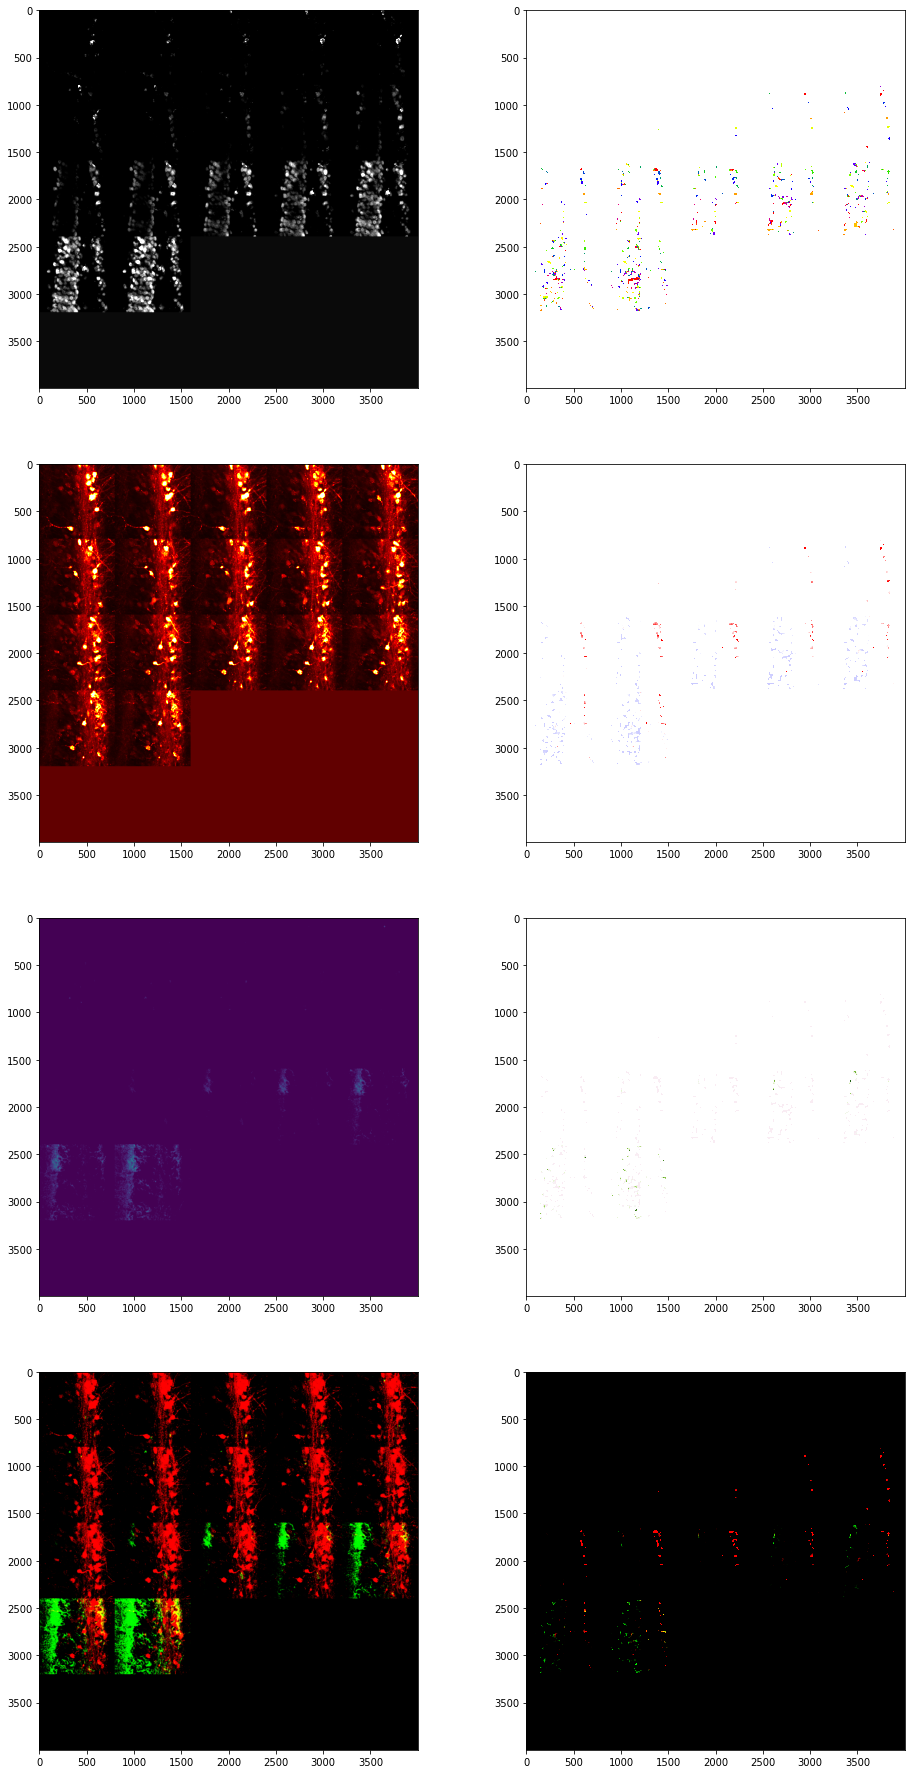

In [12]:
n=2
psize = 8
fig, axs = plt.subplots(4,2,figsize=(psize*2,psize*4))
axs=axs.flatten()
axs[0].imshow(skimage.util.montage(image_znorm[2,:,:,:]),cmap='gray',vmax=6)
axs[1].imshow(skimage.util.montage(nan_masks_id),cmap='prism')

axs[2].imshow(skimage.util.montage(image_znorm[1,:,:,:]),cmap='hot')
axs[3].imshow(skimage.util.montage(masked_composite_znorm[1,:,:,:]),cmap='bwr',vmin=-3,vmax=3)

axs[4].imshow(skimage.util.montage(image_znorm[0,:,:,:]),cmap='viridis')
axs[5].imshow(skimage.util.montage(masked_composite_znorm[0,:,:,:]),cmap='PiYG',vmin=-3,vmax=3)


merge = np.stack(   [image_znorm[1,:,:,:],
                     image_znorm[0,:,:,:],
                     image_znorm[0,:,:,:]*0])

merge_masked = merge.copy()*np.stack([nan_masks_bin] * 3,axis=0)

axs[6].imshow(skimage.util.montage(np.transpose(merge,[1,2,3,0]),multichannel=True),vmin=-1,vmax=4)
axs[7].imshow(skimage.util.montage(np.transpose(merge_masked,[1,2,3,0]),multichannel=True))

In [ ]:
model = models.Cellpose(model_type='cyto')
imgs = [image[:,:,2,zi] for zi in range(image.shape[3])]
# print(imgs)

imgs=imgs[5]
masks, flows, styles, diams = model.eval(imgs, diameter=30, channels=[0,0]) 
masks = masks.astype(float)
masks[masks==0] = np.nan
n=2
psize = 10
fig, axs = plt.subplots(1,n,figsize=(psize*n,psize))
axs= axs.flatten()
axs[0].imshow(imgs)
axs[1].imshow(masks,cmap='prism')
# plt.show()
print(diams)
print(masks)

In [ ]:
import skimage


model = models.Cellpose(model_type='cyto')
# imgs = [image[:,:,2,zi] for zi in range(image.shape[3])]
imgs = image[:,:,2,:]
imgs = np.transpose(imgs,(2,0,1))
# imgs = imgs[0:4,400:600,200:400]
masks_og, flows, styles, diams = model.eval(imgs, diameter=35, channels=[0,0], stitch_threshold=.001,do_3D=False) #anistropy
masks = masks_og.copy()
masks = masks.astype(float)
masks[masks==0] = np.nan
n=2
psize = 10
fig, axs = plt.subplots(1,n,figsize=(psize*n,psize))
axs= axs.flatten()
axs[0].imshow(skimage.util.montage(imgs),vmax = np.percentile(imgs.flatten(),99))
axs[1].imshow(skimage.util.montage(masks),cmap='prism')
# plt.show()

In [ ]:
mask_bool = masks>0
red_stack = np.transpose(image[:,:,1,:],(2,0,1))
# red_zscore = red_stack.copy()
r_cell_val = red_stack[masks_og>0].flatten()
red_zscore = (red_stack.copy() - np.mean(r_cell_val))/np.std(r_cell_val)
red_zscore[np.logical_not(mask_bool)]=0
n=2
psize = 10
fig, axs = plt.subplots(1,n,figsize=(psize*n,psize))
axs= axs.flatten()
axs[0].imshow(skimage.util.montage(red_stack),cmap='hot',vmax=np.percentile(red_stack.flatten(),99.9))
m = np.max(np.abs(red_zscore.flatten()))
m=3
axs[1].imshow(skimage.util.montage(red_zscore),cmap='bwr', vmin=-m,vmax=m)

In [ ]:
mask_bool = masks>0
green_stack = np.transpose(image[:,:,0,:],(2,0,1))
green_cell_vals = green_stack[masks_og>0].flatten()
green_zscore = (green_stack.copy() - np.mean(green_cell_vals))/np.std(green_cell_vals)
green_zscore[np.logical_not(mask_bool)]=0
n=2
psize = 10
fig, axs = plt.subplots(1,n,figsize=(psize*n,psize))
axs= axs.flatten()
axs[0].imshow(skimage.util.montage(green_stack),cmap='viridis',vmax = np.percentile(green_stack.flatten(),99))
m = np.max(np.abs(green_zscore.flatten()))
m=3
axs[1].imshow(skimage.util.montage(green_zscore),cmap='PiYG', vmin=-m,vmax=m)

In [ ]:
n=3
psize = 8
fig, axs = plt.subplots(1,n,figsize=(psize*n,psize))

merge = np.stack([np.zeros_like(green_zscore) for i in range(3)],axis=-1)
merge[:,:,:,0] = red_zscore
merge[:,:,:,1] = green_zscore
merge = merge/4


m=3
axs[0].imshow(skimage.util.montage(red_zscore),cmap='bwr', vmin=-m,vmax=m)
axs[2].imshow(skimage.util.montage(green_zscore),cmap='PiYG', vmin=-m,vmax=m)

axs[1].imshow(skimage.util.montage(merge,multichannel=True))

In [ ]:
_ = plt.hist(masks.flatten(),bins=np.arange(0,np.nanmax(masks.flatten())))

In [ ]:
import pandas as pd

cell_ids =np.arange(0,np.nanmax(masks_og.flatten()))+1
cell_df = pd.DataFrame({'cell_id':cell_ids}).set_index('cell_id')
# cell_df['size']=np.nan
# cell_df['loc_z']=np.nan
# cell_df['loc_z']=cell_df['loc_z'].astype('object')
# cell_df['loc_y']=np.nan
# cell_df['loc_y']=cell_df['loc_y'].astype('object')
# cell_df['loc_x']=np.nan
# cell_df['loc_x']=cell_df['loc_x'].astype('object')
# cell_df['redness']=np.nan
for c in cell_df.index:
    cell_df.at[c,'size'] = np.nansum((masks_og.flatten()==c)*1.)
    cell_df.at[c,'redness'] = np.sum(  red_zscore[masks_og==c]   )/cell_df.at[c,'size']
    cell_df.at[c,'greeness'] = np.sum(  green_zscore[masks_og==c]   )/cell_df.at[c,'size']


cell_df['large'] = cell_df['size'] > 1000
display(cell_df)

In [ ]:
import matplotlib as mpl

cell_df['large'] = cell_df['size'] > 100

fig, ax = plt.subplots(1,2)
ax[0].scatter( cell_df['redness'][cell_df['large']], cell_df['greeness'][cell_df['large']])
ax[0].set_xlabel('Redness')
ax[0].set_ylabel('Greeness')

ax[1].hist2d( cell_df['redness'], cell_df['greeness'], norm=mpl.colors.LogNorm())
ax[1].set_xlabel('Redness')
ax[1].set_ylabel('Greeness')


isR = cell_df['redness']>0
isG = cell_df['greeness']>0
isNG = cell_df['greeness']<0
isNR = cell_df['redness']<0

RG = np.sum(np.logical_and(isR[cell_df['large']],isG[cell_df['large']]))
nRG = np.sum(np.logical_and(isNR[cell_df['large']],isG[cell_df['large']]))
RnG = np.sum(np.logical_and(isNG[cell_df['large']],isR[cell_df['large']]))
nRnG = np.sum(np.logical_and(isNR[cell_df['large']],isNG[cell_df['large']]))


# print('P(R)',np.mean(isR[cell_df['large']]))
# print('P(R|G)',np.mean(isR[isG][cell_df['large']]))
print('P(G|nR)',np.mean(isG[isNR][cell_df['large']]))
print('P(G|R)',np.mean(isG[isR][cell_df['large']]))

print('P(nG|R)',np.mean(isNG[isR][cell_df['large']]))
print('P(nG|nR)',np.mean(isNG[isNR][cell_df['large']]))

table = np.array([[RG, nRG],
                  [RnG, nRnG]])
print(table)

oddsratio, p_value =  scipy.stats.fisher_exact(table, alternative='two-sided')
print(p_value)